In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer

In [2]:
np.random.seed(3)

In [3]:
%run utilities.py

In [4]:
x, y = load_matlab_data('hwkdataNEW.mat')

In [5]:
xtr, ytr, xts, yts, xv, yv = train_test_val_split(x, y)

In [6]:
column_names = [
    'Age', 'Weight', 'Height', 'Adiposity Index',
    'Neck Circumference', 'Chest Circumference',
    'Ab Circumference', 'Hip Circumference',
    'Thigh Circumference', 'Knee Circumference',
    'Ankle Circumference', 'Extended Bicep Circumference',
    'Forearm  Circumference', 'Wrist Circumference'
]

In [7]:
pca = PCA()
xtr_pca = pca.fit_transform(zscore(xtr)[0])

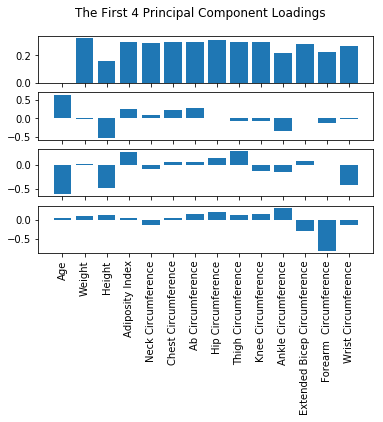

In [8]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex='col')
ax1.bar(x=column_names, height=pca.components_[0])
ax2.bar(x=column_names, height=pca.components_[1])
ax3.bar(x=column_names, height=pca.components_[2])
ax4.bar(x=column_names, height=pca.components_[3])
plt.xticks(rotation=90)
plt.suptitle("The First 4 Principal Component Loadings")
plt.show()

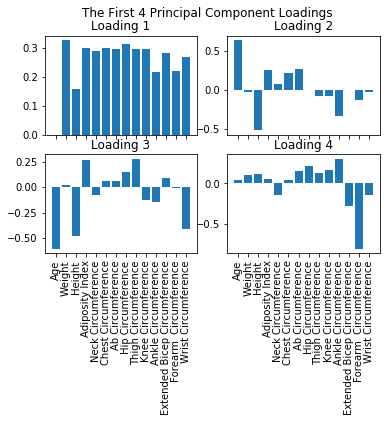

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90)
ax1.bar(x=column_names, height=pca.components_[0])
ax1.set_title('Loading 1')
ax2.bar(x=column_names, height=pca.components_[1])
ax2.set_title('Loading 2')
ax3.bar(x=column_names, height=pca.components_[2])
plt.xticks(rotation=90)
ax3.set_title('Loading 3')
ax4.bar(x=column_names, height=pca.components_[3])
plt.xticks(rotation=90)
ax4.set_title('Loading 4')
plt.suptitle("The First 4 Principal Component Loadings")
plt.show()

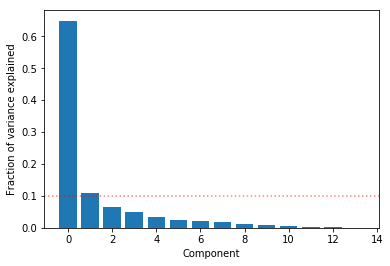

In [10]:
# Explained variance ratio
plt.bar(x=range(pca.explained_variance_.shape[0]), height=pca.explained_variance_ratio_)
#plt.yscale('log')
plt.xlabel('Component')
plt.ylabel('Fraction of variance explained')
plt.axhline(y=0.1, linestyle=':', color='r', alpha=0.5)
plt.show()

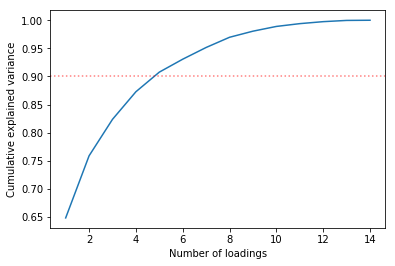

In [11]:
# Cumulative explained variance
h = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,pca.explained_variance_.shape[0]+1), h)
plt.axhline(y=0.9, linestyle=':', color='r', alpha=0.5)
plt.xlabel("Number of loadings")
plt.ylabel("Cumulative explained variance")
plt.show()

In [12]:
pca2 = PCA(n_components=7)
xtr_pca2 = pca2.fit_transform(xtr)
lr_pca_95_percent = linear_regression()
lr_pca_95_percent.fit(xtr_pca2, ytr)

In [13]:
mean_squared_error(lr_pca_95_percent.predict(pca2.transform(xtr)), ytr) ** 0.5

3.9360839661088747

In [14]:
pca.explained_variance_[0] / pca.explained_variance_[-1]

2056.538588588898

In [15]:
pca2.explained_variance_[0] / pca2.explained_variance_[-1]

376.9624757399048

In [16]:
def root_mean_squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [17]:
pipeline = Pipeline(
    memory=None,
    steps=[
        ('scale', StandardScaler()),
        ('pca', PCA()),
        ('linear', LinearRegression())
    ]
)

In [18]:
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0.9],
}

In [19]:
est = GridSearchCV(pipeline, param_grid=param_grid,
                   scoring=make_scorer(root_mean_squared_error, greater_is_better=False),
                   cv=10, return_train_score=False)

In [20]:
%pdb off

Automatic pdb calling has been turned OFF


In [21]:
est.fit(xtr, ytr)

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(root_mean_squared_error, greater_is_better=False),
       verbose=0)

In [22]:
mean_squared_error(est.predict(xts), yts) ** 0.5

3.7552956325284828

In [23]:
est.score(xts, yts)

-3.7552956325284828

In [24]:
est.best_params_

{'pca__n_components': 12}

In [25]:
est.cv_results_

{'mean_fit_time': array([0.0025439 , 0.00172677, 0.00170403, 0.00172064, 0.00149846,
        0.00150588, 0.00176487, 0.00157397, 0.00164251, 0.00191936,
        0.00168543, 0.00186577, 0.00183489, 0.00163276, 0.00158987]),
 'std_fit_time': array([9.35113906e-04, 1.36252712e-04, 3.17389933e-04, 3.41326261e-04,
        1.35944593e-05, 3.46819059e-05, 3.79048055e-04, 3.79948339e-05,
        2.46135859e-04, 3.67204200e-04, 1.77002338e-04, 3.51785740e-04,
        3.26834524e-04, 1.89524176e-05, 1.85777495e-05]),
 'mean_score_time': array([0.00052245, 0.00044978, 0.00041869, 0.00043347, 0.00038257,
        0.00039163, 0.00045106, 0.00038502, 0.00042536, 0.00046227,
        0.00042925, 0.00043905, 0.00047016, 0.00039277, 0.00038414]),
 'std_score_time': array([1.22577669e-04, 8.68238664e-05, 5.75874846e-05, 8.15477597e-05,
        4.03230598e-06, 1.82586296e-05, 8.53396283e-05, 6.06956764e-06,
        1.14932566e-04, 8.75882790e-05, 6.50515121e-05, 7.97713971e-05,
        1.47396606e-04, 7.62

In [26]:
est.scorer_

make_scorer(root_mean_squared_error, greater_is_better=False)

In [27]:
mean_squared_error(yts, est.predict(xts)) ** 0.5

3.7552956325284828

In [28]:
(-1 * est.cv_results_['mean_test_score']) ** 0.5

array([2.47681424, 2.21793944, 2.20846639, 2.23772968, 2.22419604,
       2.21889677, 2.18645072, 2.17055237, 2.17747414, 2.17111889,
       2.18676147, 2.05894856, 2.06408559, 2.09126024, 2.22419604])

In [29]:
est.score(xv, yv)

-4.218202551787994

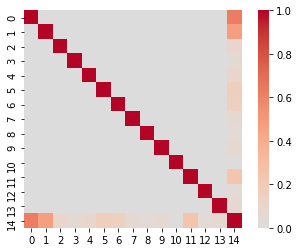

In [30]:
sns.heatmap(np.abs(np.corrcoef(xtr_pca, ytr, rowvar=False)), vmin=0, vmax=1, center=0, cmap='coolwarm', square=True)

In [31]:
ytr.shape

(188, 1)

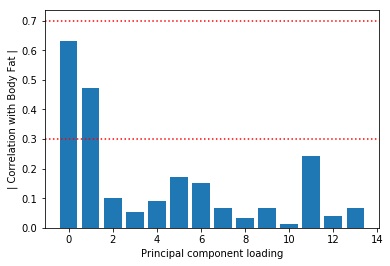

In [32]:
plt.bar(x=range(14), height=np.abs(np.corrcoef(xtr_pca, ytr, rowvar=False)[-1,:-1]))
plt.axhline(y=0.7, color='r', linestyle='dotted')
plt.axhline(y=0.3, color='r', linestyle='dotted')
#plt.axhline(y=-0.7, color='r', linestyle='dotted')
#plt.axhline(y=-0.3, color='r', linestyle='dotted')
plt.xlabel('Principal component loading')
plt.ylabel('| Correlation with Body Fat |')
plt.show()

In [33]:
np.corrcoef(xtr_pca, ytr, rowvar=False)[-1]

array([ 0.62981974,  0.47109136,  0.10067445,  0.05445248, -0.0922388 ,
       -0.17024554,  0.15007194,  0.06589927,  0.03424569, -0.06585639,
       -0.01350214, -0.24272669,  0.04034747, -0.06535694,  1.        ])

In [34]:
pca.explained_variance_

array([9.12914692e+00, 1.55408352e+00, 9.12209810e-01, 6.90643346e-01,
       4.90639458e-01, 3.23743112e-01, 2.93219275e-01, 2.55126740e-01,
       1.52507263e-01, 1.18690980e-01, 6.98945670e-02, 4.96349847e-02,
       3.08872466e-02, 4.43908370e-03])

In [35]:
xtr_pca.shape

(188, 14)

In [36]:
print(xtr_pca[:,-1].shape)
print(ytr.shape)

(188,)
(188, 1)


/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


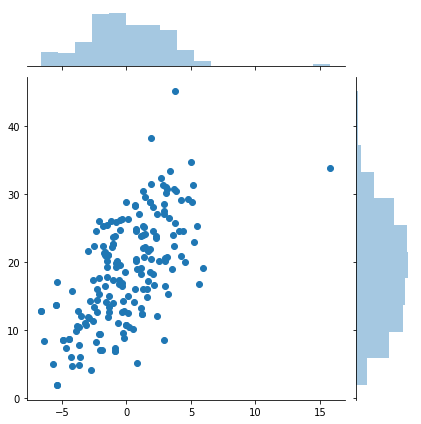

In [37]:
sns.jointplot(x=xtr_pca[:,0], y=ytr[:,0])
plt.show()

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


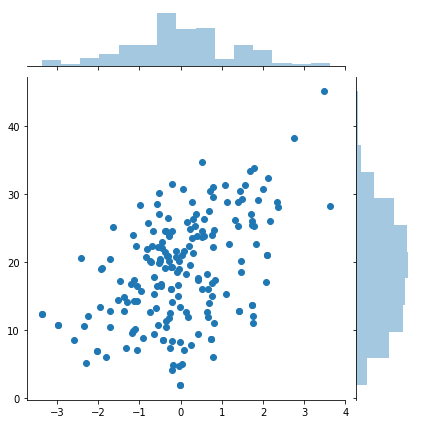

In [38]:
sns.jointplot(x=xtr_pca[:,1], y=ytr[:,0])
plt.show()

In [39]:
np.where(pca.explained_variance_ratio_ > 0.1)

(array([0, 1]),)

In [40]:
np.where(np.cumsum(pca.explained_variance_ratio_) < 0.9)

(array([0, 1, 2, 3]),)

In [41]:
pca.explained_variance_ratio_

array([6.48613402e-01, 1.10415508e-01, 6.48112593e-02, 4.90692651e-02,
       3.48592624e-02, 2.30015053e-02, 2.08328284e-02, 1.81264059e-02,
       1.08354324e-02, 8.43283180e-03, 4.96591338e-03, 3.52649778e-03,
       2.19449663e-03, 3.15390825e-04])

In [42]:
pca.explained_variance_[0] / pca.explained_variance_[4]

18.606630115579442

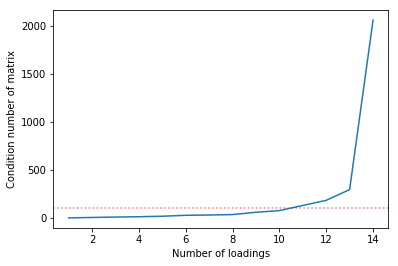

In [43]:
cond_nos = [pca.explained_variance_[0] / r for r in pca.explained_variance_]
plt.plot(range(1,15), cond_nos)
#plt.yscale('log')
plt.axhline(y=100, color='r', linestyle=':', alpha=0.5)
plt.xlabel('Number of loadings')
plt.ylabel('Condition number of matrix')
plt.savefig('images/condition_number.png', dpi=300)
plt.show()

In [44]:
cond_nos

[1.0,
 5.874296207847501,
 10.007727200523892,
 13.21832314800286,
 18.606630115579442,
 28.198737140700654,
 31.13419786586066,
 35.78279142207068,
 59.86040757719298,
 76.91525429294711,
 130.61311232271012,
 183.92565189880398,
 295.56363613751313,
 2056.538588588898]

In [45]:
pca3 = PCA(n_components=2)
xtr_pca3 = pca3.fit_transform(xtr)
lr3 = linear_regression()
lr3.fit(xtr_pca3, ytr)

In [46]:
root_mean_squared_error(lr3.predict(pca3.transform(xts)), yts)

4.722167578588255

In [47]:
pipeline2 = Pipeline(
    memory=None,
    steps=[
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('linear', LinearRegression())
    ]
)

In [48]:
pipeline2.fit(xtr, ytr)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [49]:
root_mean_squared_error(pipeline2.predict(xts), yts)

4.916291312494971

In [50]:
pipeline.fit(xtr, ytr)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [51]:
root_mean_squared_error(pipeline.predict(xts), yts)

3.83265877750213

In [52]:
pipeline3 = Pipeline(
    memory=None,
    steps=[
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=0.9)),
        ('linear', LinearRegression())
    ]
)

In [53]:
pipeline3.fit(xtr, ytr)
root_mean_squared_error(pipeline3.predict(xts), yts)

5.025354123263135

In [54]:
pipeline4 = Pipeline(
    memory=None,
    steps=[
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('linear', LinearRegression())
    ]
)

In [55]:
pipeline4.fit(xtr, ytr)
root_mean_squared_error(pipeline4.predict(xts), yts)

4.483371102762575

In [56]:
pipeline3.steps[1][1]

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca_90_percent = PCA(n_components=0.9)
pca_90_percent.fit(xtr)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca_90_percent.explained_variance_

array([1206.40415126,  183.00598789])

In [59]:
xtr_pca.shape

(188, 14)